# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
import scipy

%matplotlib inline

# Import data set

In [2]:
path = r'C:\Users\Logan\OneDrive\Desktop\Instacart Basket Analysis'

In [3]:
ords_cust_sample = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.9 IC merged_sample.pkl'))

In [4]:
ords_cust_sample.shape

(9721098, 34)

In [5]:
ords_cust_sample['days_since_prior_order'].isnull().sum()

621822

# Crosstab

In [6]:
crosstab = pd.crosstab(ords_cust_sample['days_since_prior_order'], ords_cust_sample['order_number'], dropna = False)

In [7]:
# copy to clipboard for excel analysis
crosstab.to_clipboard()

# Security Implications

In [8]:
ords_cust_sample.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'Busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days_since_prior_order',
       'order_frequency_flag', 'firstname', 'lastname', 'gender', 'state',
       'age', 'datejoined', 'numofchildren', 'maritalstatus', 'income',
       'fullname', '_merge'],
      dtype='object')

In [9]:
#replace PII information such as name with nan
ords_cust_sample[['firstname', 'lastname','fullname']] = np.nan

In [10]:
ords_cust_sample[['firstname', 'lastname','fullname']].isnull().sum()

firstname    9721098
lastname     9721098
fullname     9721098
dtype: int64

# Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set

In [11]:
ords_cust_sample['state'].sort_values().unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [12]:
northeast = ['Maine', 'New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
midwest = ['Wisconsin','Michigan','Illinois', 'Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
south = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','South Carolina','North Carolina','Florida', 'Georgia','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
west = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [13]:
len(northeast) + len(midwest) +len(south) +len(west)

51

In [14]:
# create for loop to iterate through region lists and add values to region column
result = []

for state in ords_cust_sample['state']:
    if state in northeast:
        result.append('Northeast')
    elif state in midwest:
        result.append('Midwest')
    elif state in south:
        result.append('South')
    elif state in west:
        result.append('West')
    else: 'not enough data'

In [15]:
# assign result to populate values in new region column
ords_cust_sample['region']= result

In [16]:
# check values of region column
ords_cust_sample['region'].value_counts(dropna = False)

South        3236318
West         2487728
Midwest      2280386
Northeast    1716666
Name: region, dtype: int64

In [20]:
# check values of spending flag
# mean price or expenditure less than 10 - low spender
# mean price or expenditure higher than 10 - high spender
ords_cust_sample['spending_flag'].value_counts()

Low spender     9530751
High spender     190347
Name: spending_flag, dtype: int64

In [21]:
# Determine whether there’s a difference in spending habits between the different U.S. regions
crosstab1 = pd.crosstab(ords_cust_sample['region'], ords_cust_sample['spending_flag'],dropna = False)

In [22]:
crosstab1

spending_flag,High spender,Low spender
region,,
Midwest,46814,2233572
Northeast,32419,1684247
South,63006,3173312
West,48108,2439620


The south has the most in expenditures for both high and low spender categories.

# Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [23]:
ords_cust_sample.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'Busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days_since_prior_order',
       'order_frequency_flag', 'firstname', 'lastname', 'gender', 'state',
       'age', 'datejoined', 'numofchildren', 'maritalstatus', 'income',
       'fullname', '_merge', 'region'],
      dtype='object')

In [24]:
ords_cust_sample.loc[ords_cust_sample['max_order'] < 5, 'exclusion_flag'] = 'Low-activity'
ords_cust_sample.loc[ords_cust_sample['max_order'] >= 5, 'exclusion_flag'] = 'High-activity'

In [25]:
ords_cust_sample['exclusion_flag'].value_counts(dropna=False)

High-activity    9289401
Low-activity      431697
Name: exclusion_flag, dtype: int64

In [26]:
#create filter for low activity
lowfilt = ords_cust_sample['exclusion_flag'] == 'Low-activity'

In [28]:
ords_cust_sample.loc[lowfilt, 'exclusion_flag'].value_counts()

Low-activity    431697
Name: exclusion_flag, dtype: int64

In [30]:
df_lowact = ords_cust_sample.loc[lowfilt]

In [31]:
df_lowact.shape

(431697, 36)

In [32]:
# Export low activity sample
df_lowact.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10_lowactivity.pkl'))

# Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [35]:
ords_cust_sample.loc[ords_cust_sample['age'] <= 24, 'ageprofile'] = 'Young Adult'
ords_cust_sample.loc[(ords_cust_sample['age'] > 24) & (ords_cust_sample['age'] <=64), 'ageprofile'] = 'Adult'
ords_cust_sample.loc[ords_cust_sample['age'] > 64, 'ageprofile'] = 'Senior'

In [36]:
ords_cust_sample['ageprofile'].value_counts(dropna = False)

Adult          6074928
Senior         2573835
Young Adult    1072335
Name: ageprofile, dtype: int64

# Create an appropriate visualization to show the distribution of profiles.

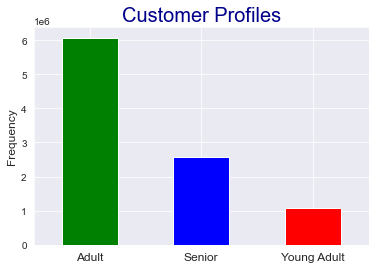

In [54]:
sns.set_style('darkgrid')
bar1 = ords_cust_sample['ageprofile'].value_counts().plot.bar(color = ['green', 'blue', 'red'])

plt.title("Customer Profiles", fontsize = 20, color='DarkBlue',fontname='Arial')
plt.ylabel("Frequency", fontsize = 12,fontname='Arial')
plt.xticks(rotation = 0, fontsize = 12, fontname = 'Arial')
plt.show()

# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [42]:
ords_cust_sample.groupby('ageprofile').agg({'median_days_since_prior_order' : ['mean','max','min']})

median_days_since_prior_order           
                                     mean   max  min
ageprofile                                          
Adult                           10.418344  30.0  0.0
Senior                          10.363899  30.0  0.0
Young Adult                     10.348374  30.0  0.0

In [48]:
ords_cust_sample.groupby('ageprofile').agg({'prices' : ['mean','max','min']})

prices           
                 mean   max  min
ageprofile                      
Adult        7.789659  25.0  1.0
Senior       7.795785  25.0  1.0
Young Adult  7.789476  25.0  1.0

In [49]:
ords_cust_sample.groupby('ageprofile').agg({'order_number' : ['mean','max','min']})

order_number        
                    mean max min
ageprofile                      
Adult          17.145641  99   1
Senior         17.100501  99   1
Young Adult    17.307349  99   1

# Customers may demonstrate different behaviors across regions, which could make this information important

In [51]:
ords_cust_sample.groupby(['ageprofile', 'region']).agg({'prices' : ['mean','max','min']})

prices           
                           mean   max  min
ageprofile  region                        
Adult       Midwest    7.787056  25.0  1.0
            Northeast  7.789864  25.0  1.0
            South      7.793961  25.0  1.0
            West       7.786346  25.0  1.0
Senior      Midwest    7.795279  25.0  1.0
            Northeast  7.790942  25.0  1.0
            South      7.800417  25.0  1.0
            West       7.793684  25.0  1.0
Young Adult Midwest    7.809510  25.0  1.0
            Northeast  7.753566  25.0  1.0
            South      7.798712  25.0  1.0
            West       7.783556  25.0  1.0

In [52]:
ords_cust_sample.groupby(['ageprofile', 'region']).agg({'median_days_since_prior_order' : ['mean','max','min']})

median_days_since_prior_order           
                                               mean   max  min
ageprofile  region                                            
Adult       Midwest                       10.440609  30.0  0.0
            Northeast                     10.512364  30.0  0.0
            South                         10.418496  30.0  0.0
            West                          10.333759  30.0  0.0
Senior      Midwest                       10.505892  30.0  0.0
            Northeast                     10.147211  30.0  0.0
            South                         10.372283  30.0  0.0
            West                          10.377768  30.0  0.0
Young Adult Midwest                       10.443900  30.0  0.0
            Northeast                     10.190946  30.0  0.0
            South                         10.285294  30.0  0.0
            West                          10.456128  30.0  0.0

In [53]:
ords_cust_sample.groupby(['ageprofile', 'region']).agg({'max_order' : ['mean','max','min']})

max_order        
                            mean max min
ageprofile  region                      
Adult       Midwest    32.748359  99   2
            Northeast  32.762608  99   2
            South      33.011636  99   3
            West       33.494943  99   3
Senior      Midwest    32.171395  99   3
            Northeast  33.746615  99   3
            South      33.043499  99   3
            West       33.037046  99   3
Young Adult Midwest    32.682278  99   3
            Northeast  34.432681  99   3
            South      33.886195  99   3
            West       32.778803  99   3

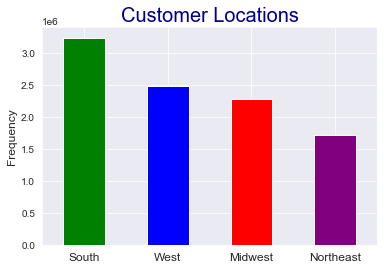

In [57]:
sns.set_style('darkgrid')
bar2 = ords_cust_sample['region'].value_counts().plot.bar(color = ['green', 'blue', 'red', 'purple'])

plt.title("Customer Locations", fontsize = 20, color='DarkBlue',fontname='Arial')
plt.ylabel("Frequency", fontsize = 12,fontname='Arial')
plt.xticks(rotation = 0, fontsize = 12, fontname = 'Arial')
plt.show()

In [58]:
# Export visualizations
bar1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_custprofiles.png'))
bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_custlocations.png'))

# Export final data set

In [59]:
ords_cust_sample.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age,datejoined,numofchildren,maritalstatus,income,fullname,_merge,region,exclusion_flag,ageprofile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,31,2/17/2019,3,married,40423,NaN,both,South,High-activity,Adult
1,473747,1,3,3,12,21.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,NaN,both,South,High-activity,Adult
2,2254736,1,4,4,7,29.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,NaN,both,South,High-activity,Adult
3,550135,1,7,1,9,20.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,NaN,both,South,High-activity,Adult
4,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,31,2/17/2019,3,married,40423,NaN,both,South,High-activity,Adult


In [61]:
ords_cust_sample.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10_finaldata.pkl'))